# EDA Tutorial - Indian Restaurants¶
 ## Introduction
 Exploratory Data Analysis (EDA) is a preliminary step of Machine Learning and is used extensively in this field. Although it is not necessary to perform EDA to build models, but it is definitely recommended as it helps to know the data better. If performed correctly, it gives us insights which are not easy to witness directly.

In this notebook, I have performed a detailed analysis on Indian Restaurants Dataset from Zomato(link). This notebook can be used as a manual to perform basic to intermediate EDA on any dataset. Following are the things that you will learn from this project :-

- 1. Knowing basic composition of data
- 2. Removing duplicates
- 3. Dealing with missing values
- 4. Understanding features
- 5. Plotting horizontal bar charts (multicolor)
- 6. Using groupby, apply, and unique functions
- 7. Scatter plot
- 8. Word Cloud
- 9. Box plot
- 10. Density plot
- 11. Bar Charts
- 12. Drawing insights and conclusions from data

Don't forget to upvote if you find this useful! :)

 So without further ado, let's get started!

## Project outline
- Importing
- Preprocessing
  - Exploring data
  - Removing duplicates
  - Dealing with missing values
  - Omitting not useful features
- EDA
  - Restaurant Chains
    - Chains vs Outlets
    - Top Restaurant Chains (by number of outlets)
    - Top Restaurant Chains (by average ratings)
  - Establishment Types
    - Number of Restaurants
    - Average Rating, Votes, and Photo count
  - Cities
    - Number of Restaurants
    - Average Rating, Votes, and Photo count
  - Cuisine
    - Total number of unique cuisines
    - Number of Restaurants
    - Highest rated cuisines
  - Highlights
    - Number of Restaurants
    - Highest rated features
    - Highlights wordcloud
 - Rating and Cost
      - Rating Distribution
        - Average Cost for two distribution
        - Price range count
        - Relation between Average price for two and Rating
        - Relation between Price Range and Rating
        - Relation between Votes and Rating
- Conclusions
  ### Importing necessary libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

#### Preprocessing
#### Exploring data

In [92]:
data = pd.read_csv("zomato_restaurants_in_India.csv")

In [95]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [98]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [100]:
data.city.nunique()

99

In [102]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [104]:
data[data["city"]=="Mumbai"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [106]:
data[data["city"]=="New Delhi"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,1,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,1545,4321,0.0,-1,-1
53885,18429148,Pa Pa Ya,['Fine Dining'],https://www.zomato.com/ncr/pa-pa-ya-saket-new-...,"Dome, Level 4, Select Citywalk, A-3, District ...",New Delhi,1,"Select Citywalk Mall, Saket",28.528391,77.218611,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.7,Excellent,3234,8344,0.0,-1,-1
53886,18418277,Ministry Of Beer,['Lounge'],https://www.zomato.com/ncr/ministry-of-beer-co...,"M 44, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633286,77.222787,...,3,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.5,Excellent,3043,9984,0.0,-1,-1
53887,18625812,Detroit,['Bar'],https://www.zomato.com/ncr/detroit-connaught-p...,"F40, 2nd Floor, Inner Circle, \nConnaught Plac...",New Delhi,1,Connaught Place,28.631357,77.220251,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.6,Excellent,1327,3255,0.0,-1,-1
53888,18423151,The Darzi Bar & Kitchen,['Casual Dining'],https://www.zomato.com/TheDarziBar?utm_source=...,"H 55, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.635508,77.219096,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.3,Very Good,3211,9618,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59842,18372693,Three Tuns Cafe & Bar,['Casual Dining'],https://www.zomato.com/ncr/three-tuns-cafe-bar...,"2nd Floor, Unity One Mall, Near Janak Puri Wes...",New Delhi,1,"Unity One Mall, Janakpuri",28.628702,77.076617,...,3,Rs.,"['Debit Card', 'Takeaway Available', 'Dinner',...",4.4,Very Good,975,3139,0.0,-1,-1
59843,18523131,Too Indian,['Casual Dining'],https://www.zomato.com/ncr/too-indian-rajouri-...,"A 39, Vishal Enclave, Rajouri Garden, New Delhi",New Delhi,1,Rajouri Garden,28.650466,77.120146,...,3,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.0,Very Good,2037,7311,0.0,-1,-1
59844,307060,The Beer Cafe - BIGGIE,['Bar'],https://www.zomato.com/ncr/the-beer-cafe-biggi...,"D-2, Inner Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633842,77.220804,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Credit Card', 'Di...",4.1,Very Good,1609,1120,0.0,-1,-1
59845,18500611,Sixth Empirica,['Casual Dining'],https://www.zomato.com/ncr/sixth-empirica-punj...,"Building 6, 2nd & 3rd Floor, NWA, Punjabi Bagh...",New Delhi,1,Punjabi Bagh,28.666524,77.123032,...,3,Rs.,"['Lunch', 'Debit Card', 'Dinner', 'Cash', 'Cre...",4.2,Very Good,1559,2791,0.0,-1,-1


In [108]:
data[data["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [110]:
data.shape

(211944, 26)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [114]:
data[data["average_cost_for_two"]==30000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
136740,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
137240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [116]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


#### Removing duplicates¶
#### Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [118]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [120]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(55568, 26)

# Oops! Looks like almost 75% of our data had duplicate rows. Its good that we got that out before getting started. Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.

 Dealing with missing values
 
 Now let's see how many variables have missing values.


In [122]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

#  We have 5 variables with some kind of missing values. Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.

#### Omitting not useful features
#### Here we will look at each feature and decide to consider them for our analysis or not:-

  1.  res_id - Unique ID for each restaurant
  2. name - Name is useful since we will use it to find top restaurants
  3. Establishment - Let's see what type of values we have in establishment

In [124]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [126]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

Quick Bites
<class 'str'>


# Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with apply( ) function. Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [128]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

Quick Bites
ick Bit
['ick Bit' 'sual Dini' 'ke' '' 'a' 'ojanal' 'eet Sh' 'ne Dini' 'od Tru'
 'ssert Parlo' 'un' 'verage Sh' 'o' 'an Sh' 'nfectione' 'od Cou'
 'tcher Sh' 'crobrewe' 'cktail B' 'p ' 'ani Ca']
['ick Bit' 'sual Dini' 'ke' 'NA' 'a' 'ojanal' 'eet Sh' 'ne Dini' 'od Tru'
 'ssert Parlo' 'un' 'verage Sh' 'o' 'an Sh' 'nfectione' 'od Cou'
 'tcher Sh' 'crobrewe' 'cktail B' 'p ' 'ani Ca']


1. url - URL is the link to restaurant's page which is not useful for us
2. address - Not useful since it has long strings and its difficult to classify
3. city - Let's check unique cities

In [130]:
x=10
y=11

In [132]:
x==y

False

In [134]:
len(data[data["city"]=="Shimla"])

218

In [136]:
len(data[data["city"]=="Agra"])

833

In [138]:
len(data["city"].unique())

99

In [140]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [142]:
data[data["city"]=="Jabalpur"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
82579,18746666,RH Chicken Point,ick Bit,https://www.zomato.com/jabalpur/rh-chicken-poi...,"Main Road, Sadar Bazaar, Cantt, Jabalpur",Jabalpur,11336,Cantt,23.154664,79.951015,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",4.5,Excellent,680,24,0.0,-1,-1
82580,18745503,Naidu's Dilli Ki Gali Parathe Wali,ick Bit,https://www.zomato.com/jabalpur/naidus-dilli-k...,"Near Mahakaushal Chamber Bhawan, Marhathal, Ci...",Jabalpur,11336,Napier Town,23.169057,79.933869,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.7,Excellent,355,14,0.0,1,-1
82581,18815413,Riyaz Hotel - 1953,ick Bit,https://www.zomato.com/jabalpur/riyaz-hotel-19...,"993, Badi Omti, Napier Town, Jabalpur",Jabalpur,11336,Napier Town,23.170673,79.937920,...,2,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",4.2,Very Good,542,9,0.0,-1,-1
82582,18746285,Badkul Restaurant,sual Dini,https://www.zomato.com/jabalpur/badkul-restaur...,"103-105, Deendayal Chowk, Opposite ISBT, ITI R...",Jabalpur,11336,Vijay Nagar,23.193550,79.913353,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Cash', 'Ta...",4.0,Very Good,451,19,0.0,1,-1
82583,18825615,Popular Fresh Momos And More,ick Bit,https://www.zomato.com/jabalpur/popular-fresh-...,"Home Science College Road, Napier Town, Jabalpur",Jabalpur,11336,Wright Town,23.160413,79.925240,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.1,Very Good,249,43,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85087,18890729,Muskan Family Restaurant,sual Dini,https://www.zomato.com/jabalpur/muskan-family-...,"Civic Center, Near Bata Showroom, Marhataal, C...",Jabalpur,11336,Civil Lines,23.167616,79.932721,...,1,Rs.,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",0.0,Not rated,3,0,0.0,-1,-1
85088,18859783,Pawar's South Indian & Chines Food,sual Dini,https://www.zomato.com/jabalpur/pawars-south-i...,"Shop No. 34, Ganjipura Chowk, Ganjipura, Jabal...",Jabalpur,11336,Cantt,23.173200,79.931319,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1
85090,18859976,Swastik Restaurant,sual Dini,https://www.zomato.com/jabalpur/swastik-restau...,"C/O Hotel Swastik, Building No 333, Napier Tow...",Jabalpur,11336,Cantt,23.162786,79.936645,...,1,Rs.,"['Cash', 'Credit Card', 'Debit Card']",0.0,Not rated,3,0,0.0,-1,-1
85091,18860323,Munna Yadav Bhojanalaya,sual Dini,https://www.zomato.com/jabalpur/munna-yadav-bh...,"In Front Of Hotel Ankit, South, Civil Lines, J...",Jabalpur,11336,Cantt,23.161508,79.948811,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1


#### Look's good.

##### 1. city_id - We can uniquely use city name or id. So one feature is enough
##### 2. locality - Let's see number of unique values

In [144]:
data["locality"].nunique()

3731

#### Although it can be an interesting feature, but since this feature has so many unique classes, we will avoid it.

1. latitude - Can be helpful while using geographic maps, but we won't be doing that here
2. longitude - Same as above
3. zipcode - Approx 80% missing values
4. country_id - Since this dataset is for Indian restaurants, there should be just one unique id here. Let's check.

In [146]:
data["country_id"].unique()

array([1])

1. locality_verbose - Same as locality

In [148]:
data["locality_verbose"].nunique()

3910

1. cuisines - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label.

In [150]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9383
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [152]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [154]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


1. timings - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

In [156]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


1. average_cost_for_two - This is an interesting feature for our analysis, although the value "0" is strange and should be an outlier

In [158]:
data["average_cost_for_two"].nunique()

145

1. price_range - Average prices automatically characterized into bins


In [160]:
data["price_range"].unique()

array([2, 1, 3, 4])

1. currency - Only one class. Not useful

In [162]:
data["currency"].unique()

array(['Rs.'], dtype=object)

1. highlights - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [164]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [166]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


1. aggregate_rating - Rating given to the restaurant
2. rating_text - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this.
3. votes - Number of votes contributing to the rating
4. photo_count - Photo uploads in reviews
##### Let's check the mean and range of above features

In [168]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


#### Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.
1. opentable_support - Not useful since no restaurant has True value for this
2. delivery - This feature has 3 classes but there is no explanation for those classes. We can  consider -1 and 0 to be one class or ignore this feature for now
3. takeaway - Again not useful since it only has one class


In [170]:
data["opentable_support"].unique()

array([ 0., nan])

In [172]:
data["delivery"].unique()

array([-1,  1,  0])

In [174]:
data["takeaway"].unique()

array([-1])

#### Now that we have taken a deep look at our data, let's start with some EDA!

### Exploratory Data Analysis (EDA)¶
#### Restaurant chains
##### Here chains represent restaurants with more than one outlet

##### Chains vs Outlets

In [176]:
outlets = data["name"].value_counts()

In [178]:
outlets

name
Domino's Pizza                   399
Cafe Coffee Day                  315
KFC                              204
Baskin Robbins                   202
Keventers                        189
                                ... 
New Swagat Corner                  1
Ornate - Restaurant & Banquet      1
Red China                          1
Wah Ustad                          1
Honeydew Restaurant                1
Name: count, Length: 41100, dtype: int64

In [180]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [182]:
data.shape

(55568, 26)

In [184]:
chains

name
Domino's Pizza                 399
Cafe Coffee Day                315
KFC                            204
Baskin Robbins                 202
Keventers                      189
                              ... 
Jay Jalaram Bhojanalay           2
Geeta Khaman House               2
Kanchan Restaurant               2
The Salt Cafe Kitchen & Bar      2
Garden Bakery                    2
Name: count, Length: 4890, dtype: int64

In [186]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


### 35% of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.

#### Top restaurant chains (by number of outlets)
#### Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.

In [188]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [190]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

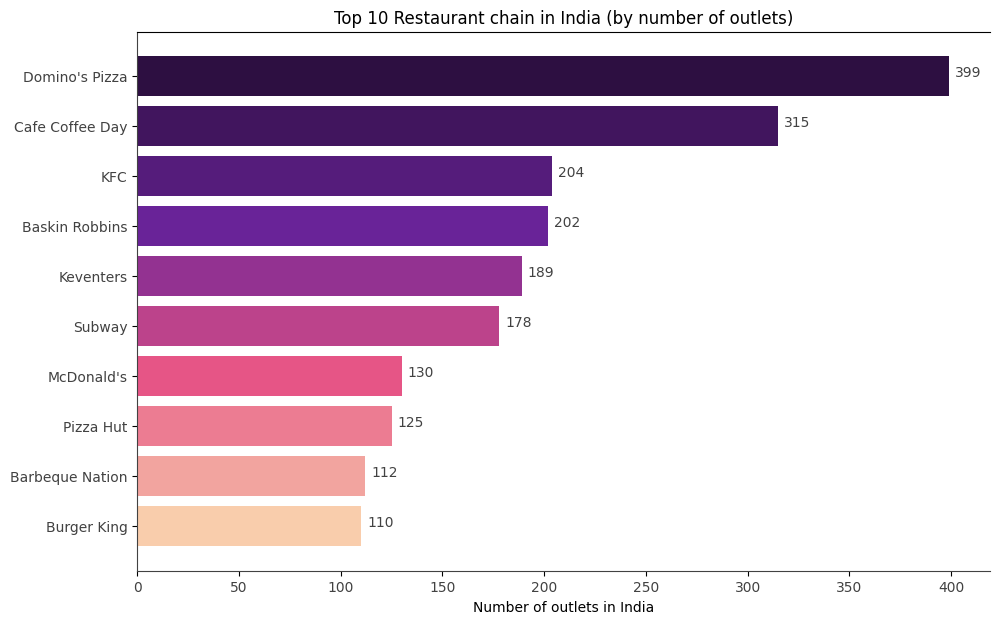

In [192]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

#### This chart is majorly dominaed by big fast food chains

Top restaurant chains (by average rating)
Here we will look at top chains by their ratings. I have set the criteria of number of outlets to greater than 4 to remove some outliers.

In [194]:
outlets = data["name"].value_counts()

In [196]:
atleast_5_outlets = outlets[outlets > 4]

In [198]:
top10_chains2 = (
    data[data["name"].isin(atleast_5_outlets.index)]
    .groupby("name")["aggregate_rating"]   # only take this column
    .mean()
    .sort_values(ascending=False)[:10]
    .sort_values(ascending=True)
)


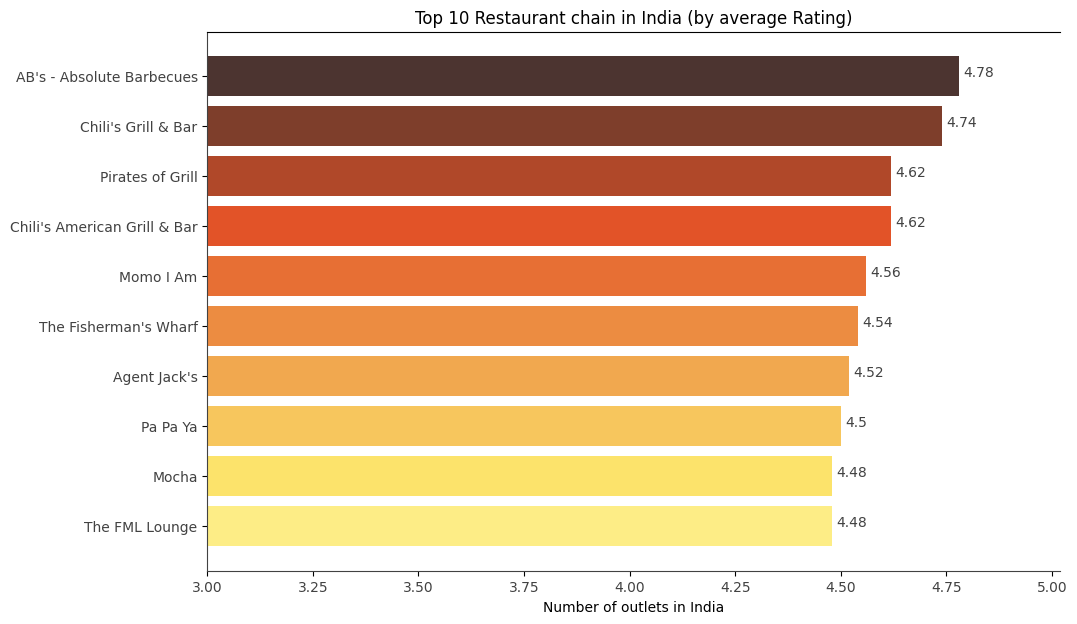

In [200]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()

# Interestingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming fast food restaurant in every street.

Establishment Types
Number of restaurants (by establishment type)


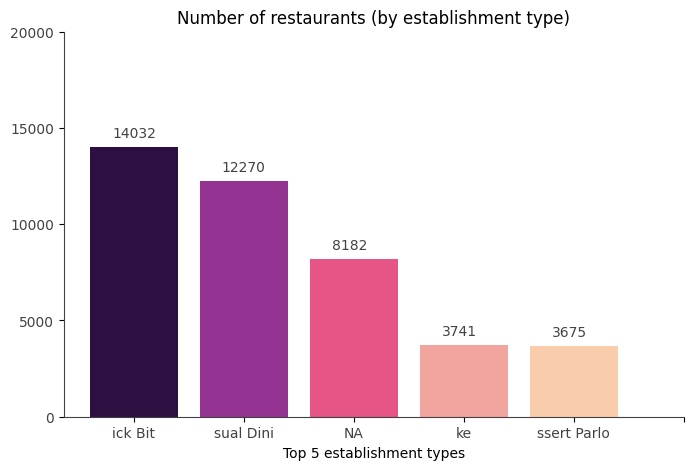

In [202]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()


# Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.

Average rating, votes and photos (by Establishment)
Here, we will not plot each graph since it will make this notebook filled with horizontal bar charts. I see horizontal bar charts the only option to display results of this kind when we have lots of classes to compare (here 10 classes). Let's look at value_counts( ) directly



In [204]:
rating_by_est = (
    data.groupby("establishment")["aggregate_rating"]  # select column first
    .mean()
    .sort_values(ascending=False)[:10]
)

rating_by_est


establishment
crobrewe       4.268182
cktail B       3.531250
ne Dini        3.436547
un             3.436463
ani Ca         3.321429
sual Dini      3.238680
tcher Sh       3.110390
NA             3.084857
ssert Parlo    3.079837
ick Bit        3.022292
Name: aggregate_rating, dtype: float64

In [206]:
# To check the number of outlets in each of the above establishment type, uncomment to following code

#est_count = data.groupby("establishment").count()["name"].sort_values(ascending=False)
#rating_by_est_map = est_count.index.isin(rating_by_est.index)
#est_count = est_count[rating_by_est_map][rating_by_est.index]
#est_count

In [208]:
data.groupby("establishment")["votes"].mean().sort_values(ascending=False)[:10]

establishment
crobrewe       1992.300000
un              494.509756
sual Dini       396.339935
cktail B        309.625000
NA              308.013811
ne Dini         293.126384
ani Ca          178.714286
ick Bit         177.031784
ssert Parlo     119.556463
a                93.273425
Name: votes, dtype: float64

In [210]:
data.groupby("establishment")["photo_count"].mean().sort_values(ascending=False)[:10]

establishment
crobrewe       2042.054545
cktail B        555.625000
un              514.687805
ne Dini         364.817590
NA              300.382303
sual Dini       291.550448
ani Ca          173.000000
ssert Parlo      94.535510
ke               78.091419
ick Bit          54.157212
Name: photo_count, dtype: float64

# It can be concluded that establishments with alcohol availability have highest average ratings, votes and photo uploads.

# Cities
Number of restaurants (by city)


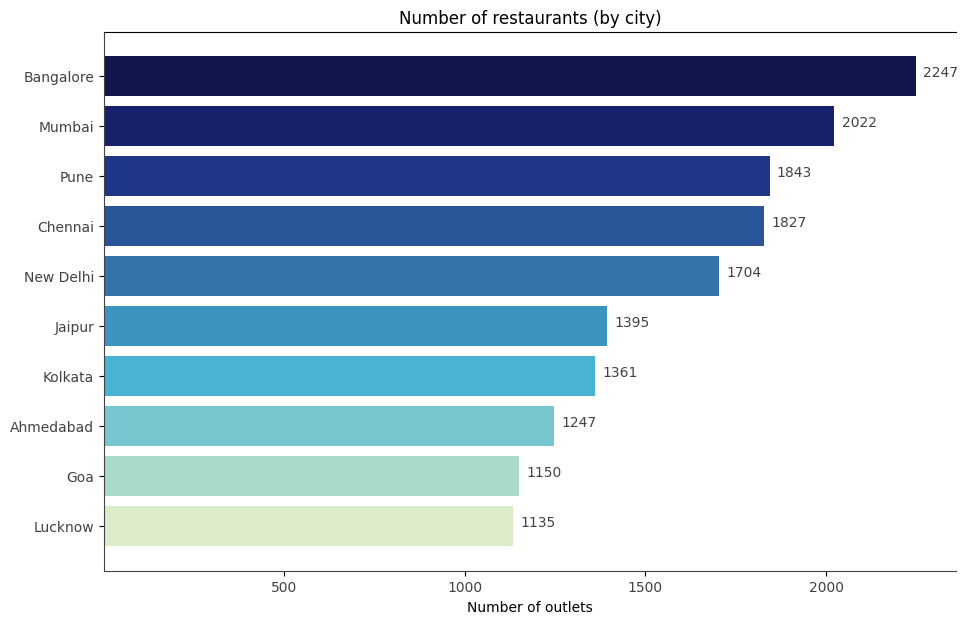

In [212]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

# As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

Average rating, votes and photos (by city)


In [214]:
rating_by_city = data.groupby("city")["aggregate_rating"].mean().sort_values(ascending=False)[:10]
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [216]:
# To check the number of outlets in each of the above establishment type

#city_count = data.groupby("city").count()["name"].sort_values(ascending=False)
#rating_by_city_map = city_count.index.isin(rating_by_city.index)
#city_count = city_count[rating_by_city_map][rating_by_city.index]
#city_count

In [218]:
data.groupby("city")["votes"].mean().sort_values(ascending=False)[:10]

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [220]:
data.groupby("city")["photo_count"].mean().sort_values(ascending=False)[:10]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

# Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet.

# Cuisine
#### Unique cuisines

In [222]:
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


#### Number of restaurants (by cuisine)


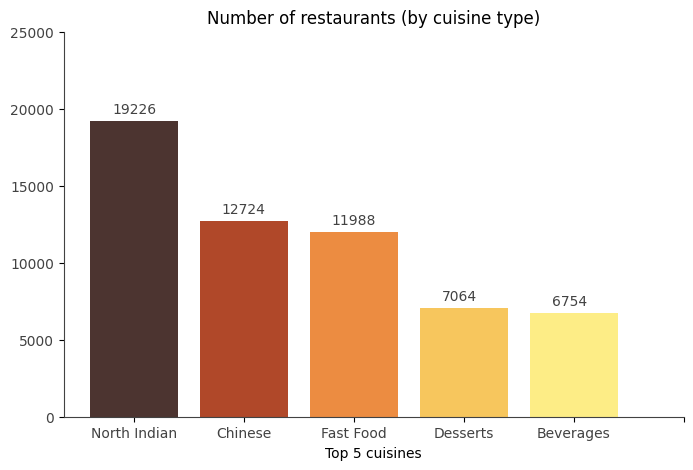

In [224]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

# Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.

#### Highest rated cuisines¶

In [226]:
data["cuisines2"] = data['cuisines'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [228]:
for i, x in data.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j, "Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j, "Total"] += 1

In [230]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r


,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [232]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]


,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


#### We can ignore a few cuisines in this list since they are available in less number. But the overall conclusion which can be drawn is that International (and rarely available) cuisines are rated higher than local cuisines.

#### Highlights/Features of restaurants
#### Unique highlights¶

In [234]:
print("Total number of unique cuisines = ", hl.nunique())


Total number of unique cuisines =  104


# Number of restaurants (by highlights)

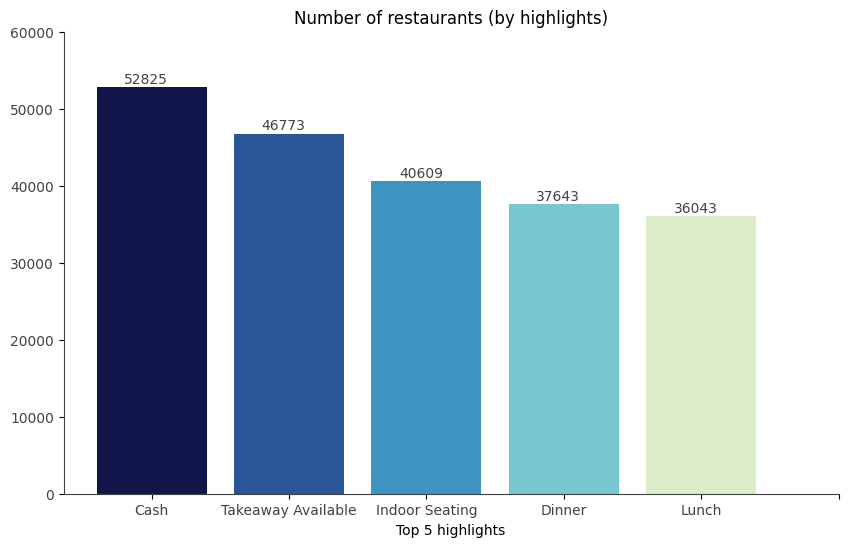

In [236]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()


# Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customers.

## Highest rated highlights

In [238]:
data["highlights"][0]


"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [240]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])

In [242]:
for i, x in data.iterrows():
    for j in x["highlights2"]:
        h_and_r.loc[j, "Sum"] += x["aggregate_rating"]
        h_and_r.loc[j, "Total"] += 1


In [244]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
Lunch,113340.8,36043.0,3.144600
Takeaway Available,139848.5,46773.0,2.989941
Credit Card,94107.2,27530.0,3.418351
Dinner,118364.5,37643.0,3.144396
Cash,157862.8,52825.0,2.988411
...,...,...,...
Celebrity Frequented,90.1,22.0,4.095455
Alipay Accepted,3.0,1.0,3.000000
Subscription Available,4.1,1.0,4.100000
Subscription Required,4.5,1.0,4.500000


In [246]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Subscription Required,4.500000,1.0
Speakeasy,4.300000,3.0
Gastro Pub,4.198551,69.0
Craft Beer,4.197297,148.0
Romantic Dining,4.162416,149.0
Sneakpeek,4.128316,392.0
Subscription Available,4.100000,1.0
Celebrity Frequented,4.095455,22.0
Keto Options,4.049153,59.0
Pet Friendly,4.017576,165.0


# We can safely ignore highlights which have a frequency of less than 10 since they can be considered as outliers. Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.

#### Highlights wordcloud
#### Here we will create a wordcloud of top 30 highlights



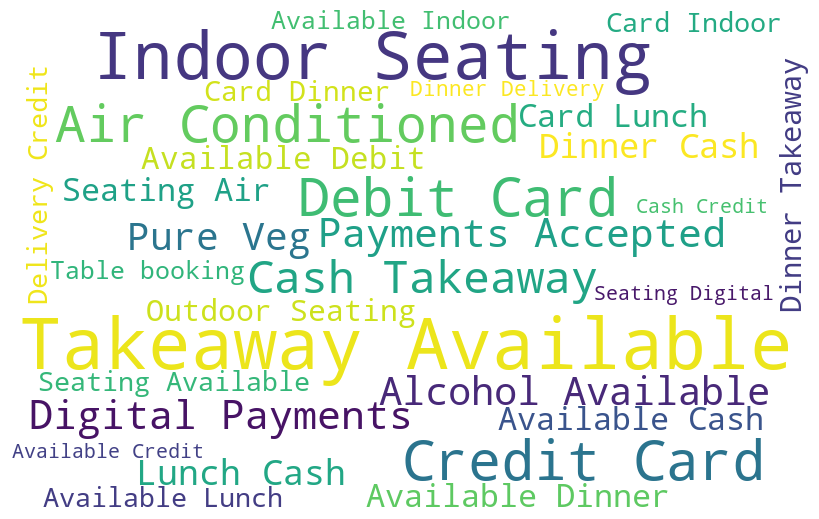

In [357]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


# Ratings and cost¶
# Ratings distribution
# Let's see how the ratings are distributes

C:\Users\vaibh\AppData\Local\Temp\ipykernel_25880\345185165.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aggregate_rating'], shade=True)


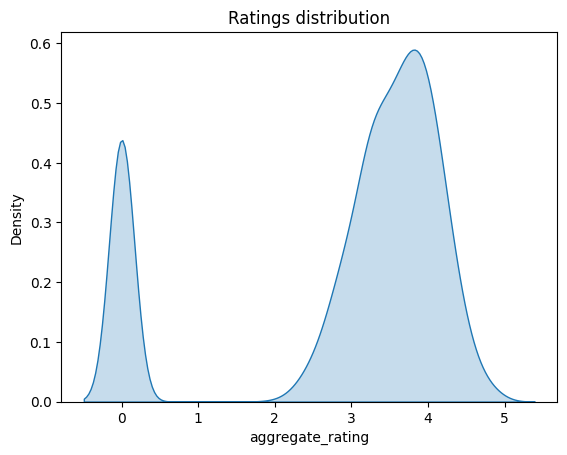

In [250]:
sns.kdeplot(data['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()


# There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.

#### Avergae cost for two distribution

C:\Users\vaibh\AppData\Local\Temp\ipykernel_25880\3483524634.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)


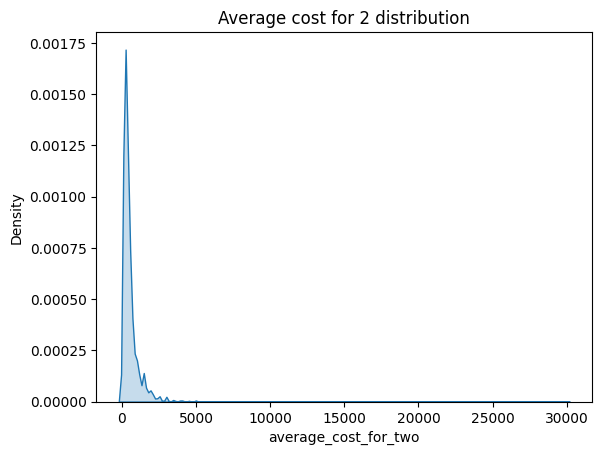

In [252]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

# With few restaurants charging average of Rs.25000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 60000.


C:\Users\vaibh\AppData\Local\Temp\ipykernel_25880\1606474467.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)


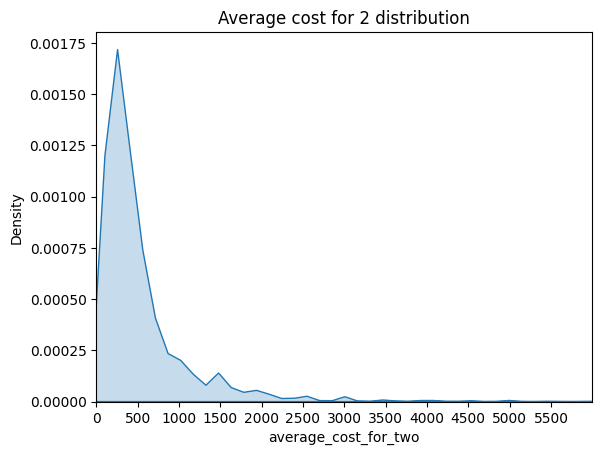

In [254]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

# Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

#### Price range count

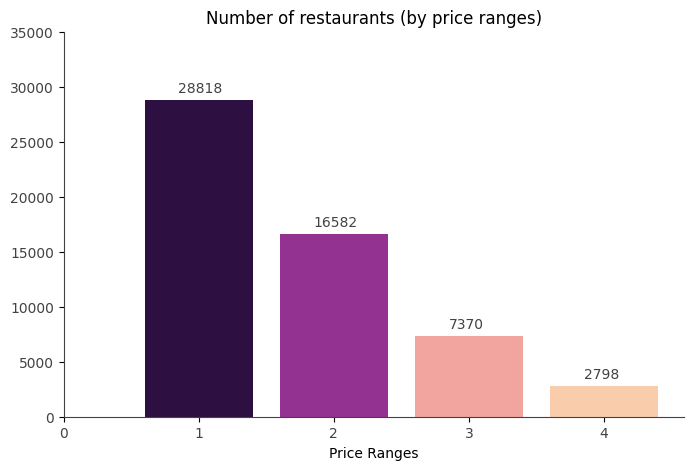

In [256]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()


# Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

# Relation between Average price for two and Rating

In [258]:
np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_25880\2753989930.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)


np.float64(0.25)


# A correlation can be seen between restaurant average cost and rating

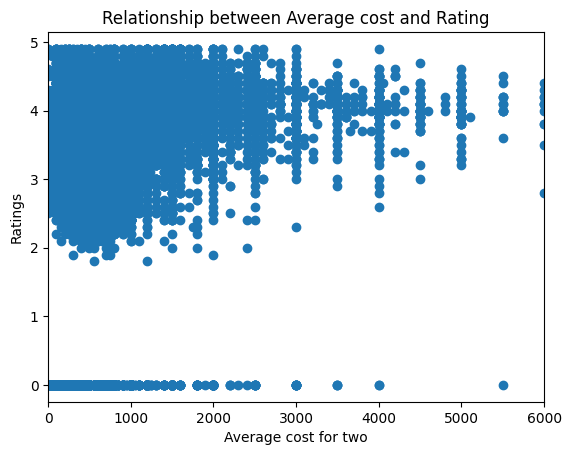

In [260]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

# There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.

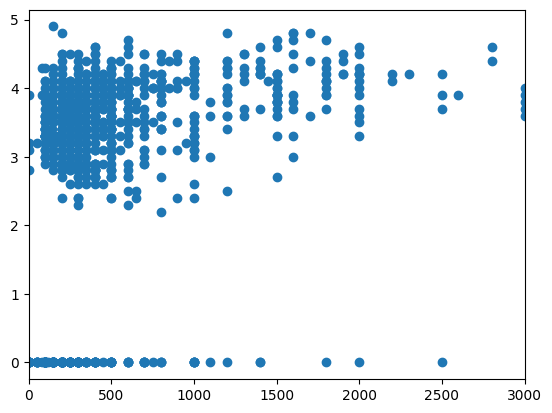

In [262]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

# This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.

Relation between Price range and Rating

In [264]:
np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_25880\3032599960.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)


np.float64(0.25)

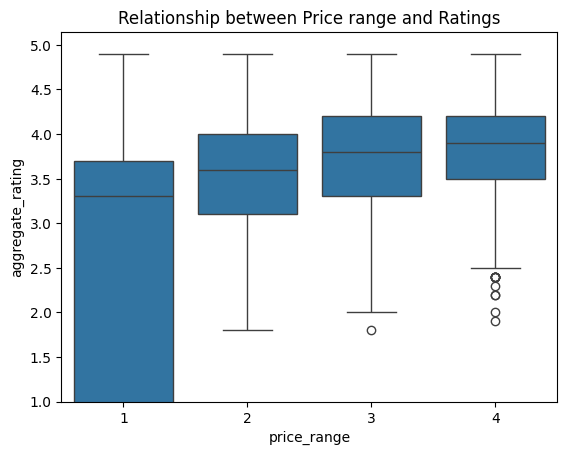

In [266]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

# Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

Conclusions
After working on this data, we can conclude the following things:-

1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. After North Indian, Chinese is the most prefered cuisine in India
9. International cuisines are better rated than local cuisines
10. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
11. Most restaurants are rated between 3 and 4
12. Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
13. There are less number of restaurants at higher price ranges
14. As the average cost of two increases, the chance of a restaurant having higher rating increases
- Now we have come to the end of this project, I hope you learned some new tricks.

- Please give this notebook an upvote if you find it useful!


In [267]:
data.to_csv("zomato_final.csv")